In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

%matplotlib inline


df_oil = pd.read_excel("/Users/seojunebeom/Desktop/대학교/2022 1학기/기계학습/R3 fbprophet 성능평가 데이터/WTI 유가.xlsx")

df_gold = pd.read_excel("/Users/seojunebeom/Desktop/대학교/2022 1학기/기계학습/R3 fbprophet 성능평가 데이터/금.xlsx",index_col=0)






,ds,yhat,종가,MA,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,날짜
0,2000-01,21.008607,25.55,4.541393,NaN,NaN,NaN,NaN,NaN,2000-01-04
1,NaN,21.094705,24.91,3.815295,NaN,NaN,NaN,NaN,NaN,2000-01-05
2,NaN,21.199828,24.78,3.580172,NaN,NaN,NaN,NaN,NaN,2000-01-06
3,NaN,21.215509,24.22,3.004491,NaN,NaN,NaN,NaN,NaN,2000-01-07
4,NaN,21.237422,24.67,3.432578,NaN,NaN,NaN,NaN,NaN,2000-01-10
...,...,...,...,...,...,...,...,...,...,...
6084,NaN,64.420627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-18
6085,NaN,64.365156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-19
6086,NaN,63.630874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-20
6087,NaN,63.126108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-21


In [2]:
#fbprophet 사용 형식에 맞추기

df_tmp = pd.DataFrame({"ds":df["날짜"], "y":df["종가"], "yhat":df["yhat"]})
df_target = df_tmp[:-1]	# 끝에 NaN 값을 제거함

df = df_target.copy()
df["ds"] = pd.to_datetime(df_target["ds"], format="%Y-%m-%d")

# .info()로 확인하면 object이기 때문에 숫자로 바꿔줌
df["y"] = df["y"].astype("float")
df["yhat"] = df["yhat"].astype("float")


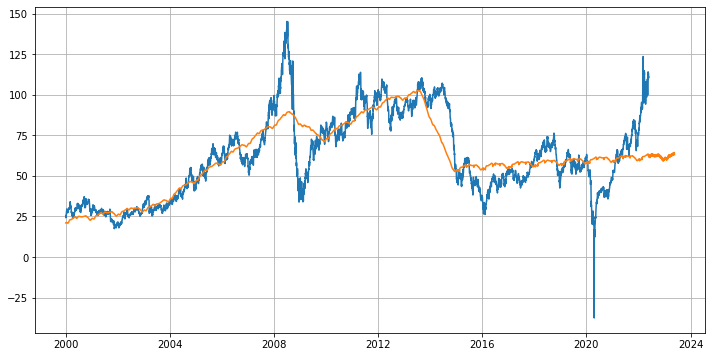

In [3]:
#fbprophet 과 실제 데이터 성능평가 비교

plt.figure(figsize=(12,6))
plt.plot(df["ds"], df["y"], label="real")
plt.plot(df["ds"], df["yhat"], label='real')
plt.grid(True)
plt.show()

In [4]:
#2000년~2021년 데이터 필터링

df_filtered = df.query('"2000-01-04"<= ds <= "2021-12-31"')['y']

#2022년 하반기 데이터 예측값범위생성& 2022년 하반기 평균데이터 출력
df_ha22 = df.query('"2022-07-01"<= ds <= "2022-12-31"')
avg22ha = df_ha22['yhat'].mean()

print(avg22ha)


#2022년 데이터 예측값범위생성& 2022년 평균데이터 출력
df_whole22 = df.query('"2020-01-04"<= ds <= "2022-12-31"')
avg22whole = df_whole22['yhat'].mean()

print(avg22whole)


62.24324363960924
61.29871592551408


In [5]:
df_filtered

0       25.55
1       24.91
2       24.78
3       24.22
4       24.67
        ...  
5617    75.57
5618    75.98
5619    76.56
5620    76.99
5621    75.21
Name: y, Length: 5622, dtype: float64

In [6]:
oil_max =df_filtered.max()
oil_min =df_filtered.min()

oil_tick = 255/(oil_max - oil_min)

print(oil_max)
print(oil_min)

oil_tick


145.29
-37.63


1.3940520446096656

In [7]:
rgb22ha = (avg22ha - oil_min)*oil_tick
rgb22whole = (avg22whole - oil_min)*oil_tick

print(rgb22ha)
print(rgb22whole)

139.22849949759654
137.91177870657168
